In [1]:
suppressPackageStartupMessages(require(tidyverse))
suppressPackageStartupMessages(require(data.table))


In [13]:
repo_dir <- '/home/ytanigaw/repos/rivas-lab/PRS'
ct_HC_df <- fread(file.path(repo_dir, 'public_output/vanilla_PRS/HC_20190302.tsv'))
snpnet_HC_df <- fread(file.path(repo_dir, 'public_output/snpnet_PRS/HC_20190303.tsv'))
ct_cancer_df <- fread(file.path(repo_dir, 'public_output/vanilla_PRS/cancer_20190302.tsv'))
snpnet_cancer_df <- fread(file.path(repo_dir, 'public_output/snpnet_PRS/cancer_20190303.tsv'))

In [25]:
short_names_df <- fread('/home/ytanigaw/Downloads/GBE_names.tsv')


In [37]:
snpnet_cancer_df %>% head()

#GBE_ID,PRS_model,phe_type,features,R_or_AUC,phe_name,N
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
cancer1001,snpnet_PRS,bin,Covariates_only,0.7051802,lung_cancer,1981
cancer1001,snpnet_PRS,bin,Genotype_and_covariates,0.7057319,lung_cancer,1981
cancer1001,snpnet_PRS,bin,Genotype_only,0.5229068,lung_cancer,1981
cancer1002,snpnet_PRS,bin,Covariates_only,0.7998432,breast_cancer,11243
cancer1002,snpnet_PRS,bin,Genotype_and_covariates,0.8167989,breast_cancer,11243
cancer1002,snpnet_PRS,bin,Genotype_only,0.5902129,breast_cancer,11243


In [40]:
plot_data_df <- bind_rows(
    ct_HC_df %>% filter(features == 'PRS_and_covars') %>% select(-features),
    ct_cancer_df %>% filter(features == 'PRS_and_covars') %>% select(-features),
    snpnet_HC_df %>% filter(features == 'Genotype_and_covariates')%>% select(-features),
    snpnet_cancer_df %>% filter(features == 'Genotype_and_covariates')%>% select(-features)    
) %>%
filter(N >= 1000) %>%
arrange(phe_name) %>%
spread(PRS_model, R_or_AUC) %>% 
rename(
    'snpnet' = 'snpnet_PRS',
    'C+T(1e-3)' = 'vanilla_PRS_1e-3',
    'C+T(1e-4)' = 'vanilla_PRS_1e-4', 
    'C+T(1e-5)' = 'vanilla_PRS_1e-5'    
) %>%
select(-phe_type, -phe_name, -N) %>%
drop_na() %>%
rename('GBE_ID' = '#GBE_ID') %>%
left_join(
    short_names_df %>% select(GBE_ID, GBE_short_name, GBE_N),
    by='GBE_ID'
) %>%
rename('Phenotype' = 'GBE_short_name')

In [84]:
plot_data_df %>% dim()

[1] 22  7

In [76]:
p <- plot_data_df %>% gather(model, AUC, -GBE_ID, -Phenotype, -GBE_N) %>%
ggplot(aes(x = Phenotype, y = AUC, fill=model)) +
geom_bar(stat="identity", position=position_dodge()) + 
theme_bw() +
coord_flip() + 
scale_fill_manual(values=c("#4DC4FF", "#03AF7A", "#FFF100", "#FF4B3E")) +
labs(
    y = 'AUC in held-out test set',
    fill = 'PRS model',
    x = ''
) + 
theme(legend.position = 'bottom')


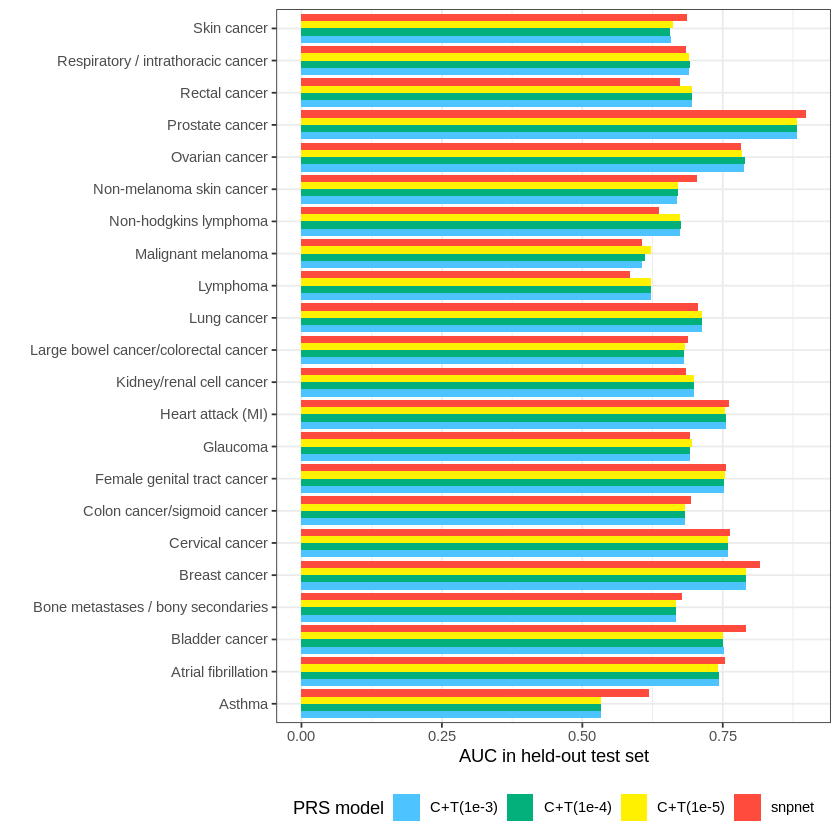

In [81]:
p + ggsave('snpnet_vs_PRS.png', height = 7, width = 8)